# **Analyse des Données Énergétiques pour Améliorer la Gestion de la Consommation dans une Ville**

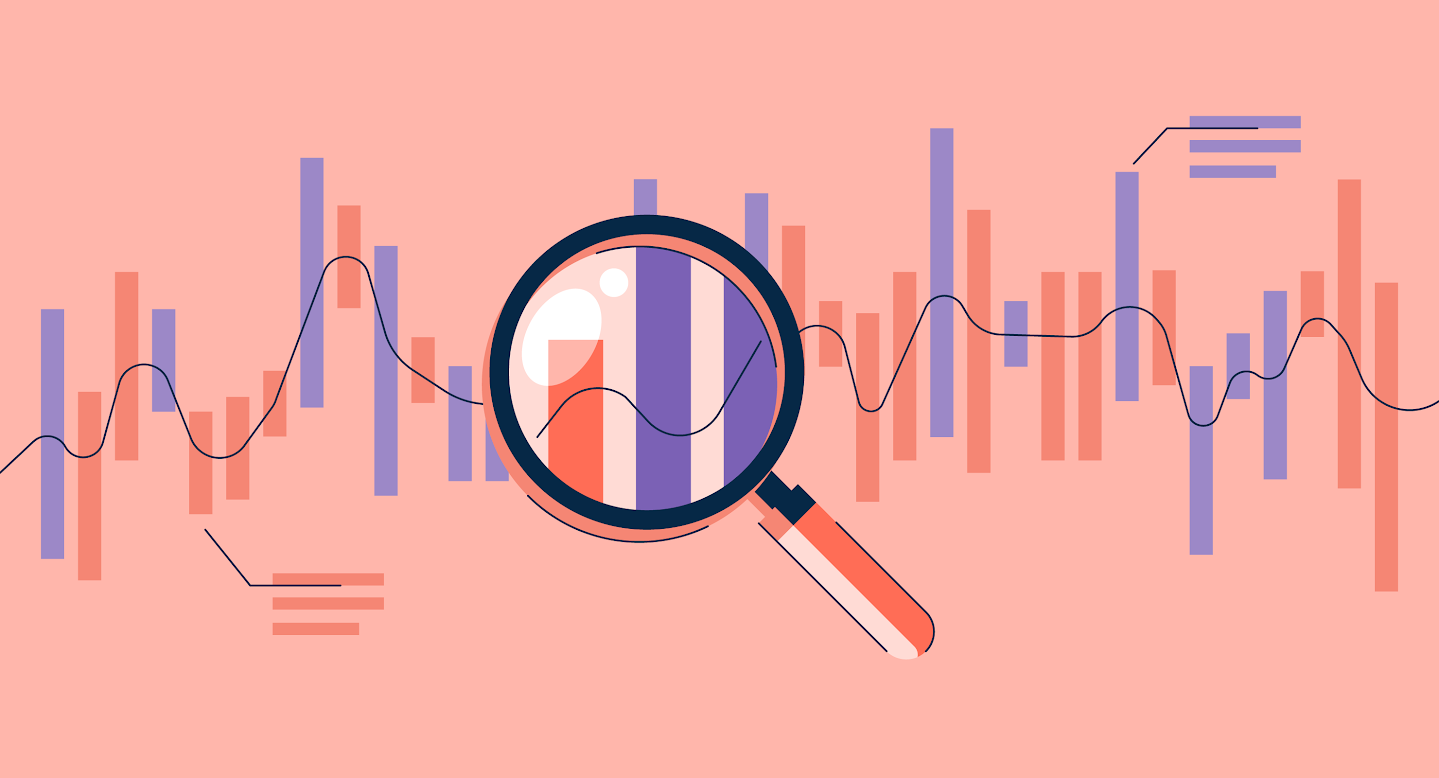

# *`Cette étude se concentre sur l'analyse des données énergétiques afin d'améliorer la gestion de la consommation d'énergie dans un environnement urbain. L'objectif est d'identifier des tendances, de tirer des conclusions et de proposer des stratégies pour optimiser l'utilisation de l'énergie, contribuant ainsi à une ville plus durable, plus efficace et plus respectueuse de l'environnement.`*

> **1 .**
> ## **Import et lecture des données**
> ****

- ### **Import des librairies nécessaires**

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

- ### **Charger et lire le Dataset**

In [2]:
df = pd.read_csv('powerconsumption.csv')

df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [4]:
# Créer une copie du DataFrame
data = df.copy(deep=True)

In [5]:
# Dictionnaire pour traduire les noms de colonnes anglaises en français
dict_colonnes_francaises = {
    'Datetime': 'DateHeure',
    'Temperature': 'Température',
    'Humidity': 'Humidité',
    'WindSpeed': 'VitesseDuVent',
    'GeneralDiffuseFlows': 'FluxDiffusGénéraux',
    'DiffuseFlows': 'FluxDiffus',
    'PowerConsumption_Zone1': 'ConsommationD’énergie_Zone1',
    'PowerConsumption_Zone2': 'ConsommationD’énergie_Zone2',
    'PowerConsumption_Zone3': 'ConsommationD’énergie_Zone3',
}

# Traduire les noms des colonnes
data.columns = [dict_colonnes_francaises[col] for col in data.columns]
data.columns.values

array(['DateHeure', 'Température', 'Humidité', 'VitesseDuVent',
       'FluxDiffusGénéraux', 'FluxDiffus', 'ConsommationD’énergie_Zone1',
       'ConsommationD’énergie_Zone2', 'ConsommationD’énergie_Zone3'],
      dtype=object)

In [6]:
data.shape

(52416, 9)

In [7]:
# Définir 'DateHeure' comme index pour faciliter l'analyse des séries temporelles
data.set_index('DateHeure', inplace=True)

# Convertir l'index en objet pandas Datetime
data.index = pd.to_datetime(data.index)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Température                  52416 non-null  float64
 1   Humidité                     52416 non-null  float64
 2   VitesseDuVent                52416 non-null  float64
 3   FluxDiffusGénéraux           52416 non-null  float64
 4   FluxDiffus                   52416 non-null  float64
 5   ConsommationD’énergie_Zone1  52416 non-null  float64
 6   ConsommationD’énergie_Zone2  52416 non-null  float64
 7   ConsommationD’énergie_Zone3  52416 non-null  float64
dtypes: float64(8)
memory usage: 3.6 MB


<Axes: ylabel='count'>

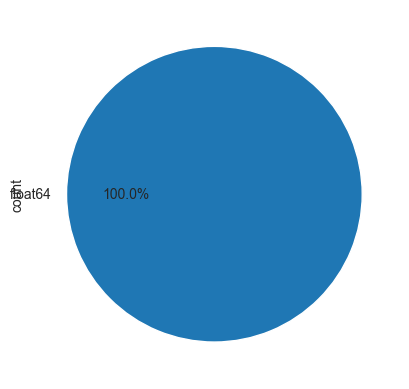

In [9]:
data.dtypes.value_counts().plot.pie(autopct='%1.1f%%')

- ### Afficher les statistiques descriptives

In [10]:
# Résumé statistique
data.describe()

,Température,Humidité,VitesseDuVent,FluxDiffusGénéraux,FluxDiffus,ConsommationD’énergie_Zone1,ConsommationD’énergie_Zone2,ConsommationD’énergie_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


- ### Visualisation de la consommation d'énergie

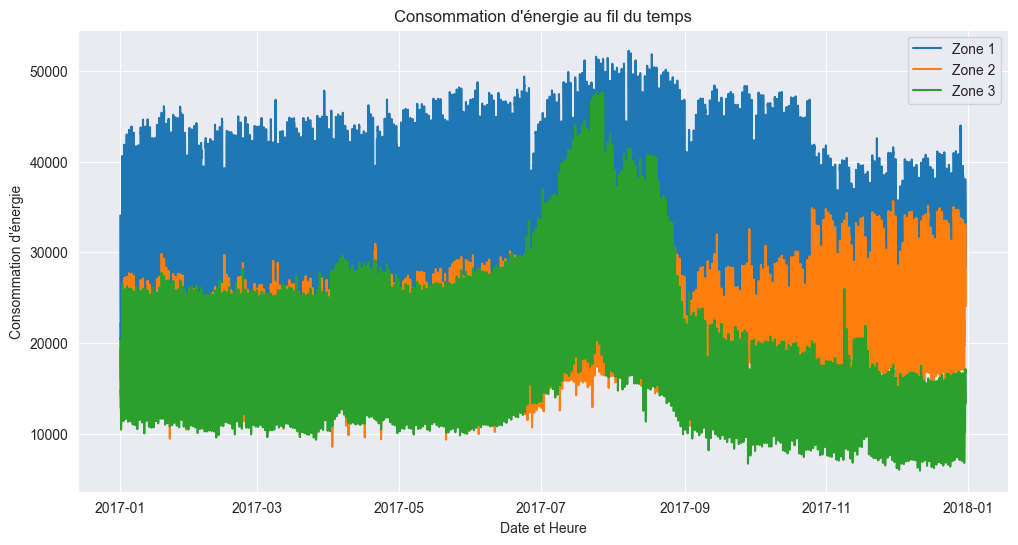

In [11]:
# Visualisation de la consommation d'énergie pour chaque zone
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y='ConsommationD’énergie_Zone1', data=data, label='Zone 1')
sns.lineplot(x=data.index, y='ConsommationD’énergie_Zone2', data=data, label='Zone 2')
sns.lineplot(x=data.index, y='ConsommationD’énergie_Zone3', data=data, label='Zone 3')
plt.xlabel('Date et Heure')
plt.ylabel('Consommation d\'énergie')
plt.title('Consommation d\'énergie au fil du temps')
plt.legend()
plt.show()


À ce stade de notre analyse, nous avons importé les bibliothèques nécessaires et chargé notre dataset, ce qui nous a permis de jeter un premier coup d'œil à sa structure et à son contenu. Le fichier de données, nommé "**powerconsumption.csv**", contient **52 416 lignes** et **9 colonnes** :

- **`DateHeure`** (**index, type : Datetime**) : enregistre l’horodatage de chaque relevé de consommation d'énergie, un élément essentiel pour toute analyse temporelle.

- **`Température`, `Humidité`, `VitesseDuVent`** (**type : float**) : Ces facteurs environnementaux influencent certainement l'utilisation de l'énergie.

- **`FluxDiffusGénéraux`, `FluxDiffus`** (**type : float**) : ces variables semblent liées au flux d'énergie, mais nous devrons approfondir pour mieux comprendre leur signification.

- **`ConsommationD’énergie_Zone1`, `ConsommationD’énergie_Zone2`, `ConsommationD’énergie_Zone3`** (**type : float**) : ces colonnes représentent la consommation d'énergie dans trois zones distinctes, ce qui nous permettra d'analyser les schémas de consommation selon les différents lieux.

Nous avons aussi effectué un prétraitement de base des données, un résumé statistique et tracé la consommation d'énergie de trois zones différentes au fil du temps.

> **2 .**
> ## **Traitement de données**
> ****

- ### **Vérifier les doublons**

In [12]:
# Compter le nombre de valeurs dupliquées
duplicated_values = data.duplicated().sum()

duplicated_values

0

- ### **Vérifier les valeurs manquantes**

In [13]:
# Afficher le nombre de valeurs manquantes ainsi que leur pourcentage
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_table

,Missing Values,Percentage
Température,0,0.0
Humidité,0,0.0
VitesseDuVent,0,0.0
FluxDiffusGénéraux,0,0.0
FluxDiffus,0,0.0
ConsommationD’énergie_Zone1,0,0.0
ConsommationD’énergie_Zone2,0,0.0
ConsommationD’énergie_Zone3,0,0.0


- ### **Resampler les données par jour en prenant la moyenne quotidienne**

In [14]:
# Vérifier si les horodatages sont dans l'ordre chronologique
print("Vérifier si l'index est monotone :", data.index.is_monotonic_increasing)

# Vérifier si les horodatages sont équidistants
time_differences = data.index.to_series().diff()
print("Vérifier si les différences de temps sont constantes :", time_differences.nunique() == 1)

Vérifier si l'index est monotone : True
Vérifier si les différences de temps sont constantes : True


In [15]:
# Resampler les données par jour et calculer la moyenne pour les colonnes numériques
daily_mean_data = data.resample('D').mean()

# Renommer l'index
daily_mean_data.index.name = 'Date'

daily_mean_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2017-01-01 to 2017-12-30
Freq: D
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Température                  364 non-null    float64
 1   Humidité                     364 non-null    float64
 2   VitesseDuVent                364 non-null    float64
 3   FluxDiffusGénéraux           364 non-null    float64
 4   FluxDiffus                   364 non-null    float64
 5   ConsommationD’énergie_Zone1  364 non-null    float64
 6   ConsommationD’énergie_Zone2  364 non-null    float64
 7   ConsommationD’énergie_Zone3  364 non-null    float64
dtypes: float64(8)
memory usage: 25.6 KB


In [16]:
daily_mean_data.head(3)

,Température,Humidité,VitesseDuVent,FluxDiffusGénéraux,FluxDiffus,ConsommationD’énergie_Zone1,ConsommationD’énergie_Zone2,ConsommationD’énergie_Zone3
Date,,,,,,,,
2017-01-01,9.675299,68.519306,0.315146,121.390771,25.993924,28465.232067,17737.791287,17868.795181
2017-01-02,12.476875,71.456319,0.076563,120.404486,27.227410,28869.493671,19557.725431,17820.763053
2017-01-03,12.100000,74.981667,0.076715,120.686014,28.574660,30562.447257,20057.269504,17620.803213


In [17]:
# Sauvegarde des données resampler dans un fichier CSV
daily_mean_data.to_csv('powerconsumption_resampled.csv', index=True)

- ### **Identification des valeurs aberrantes**

In [18]:
# Identification des données aberrantes - IQR

# Fonction pour détecter les outliers
def detecter_valeurs_aberrantes(data):
    # Stocker les résultats
    resultats = {}
    
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        borne_inferieure = Q1 - 1.5 * IQR
        borne_superieure = Q3 + 1.5 * IQR
        
        valeurs_aberrantes = data[(data[col] < borne_inferieure) | (data[col] > borne_superieure)]
        
        if not valeurs_aberrantes.empty:
            pourcentage_aberrantes = (len(valeurs_aberrantes) / len(data)) * 100
            
            # Stocker les résultats dans un dictionnaire
            resultats[col] = {
                'nombre_valeurs_aberrantes': len(valeurs_aberrantes),
                'pourcentage': pourcentage_aberrantes,
                'valeurs_aberrantes': valeurs_aberrantes[col].values
            }
    
    # Afficher les résultats pour les colonnes avec des valeurs aberrantes
    for variable, info in resultats.items():
        print(f"Variable: {variable}")
        print(f"Nombre de valeurs aberrantes: {info['nombre_valeurs_aberrantes']}")
        print(f"Pourcentage de valeurs aberrantes: {info['pourcentage']:.2f}%")
        print(f"Valeurs aberrantes: {info['valeurs_aberrantes']}")
        print("\n")

    return resultats


resultats_val_aberrantes = detecter_valeurs_aberrantes(daily_mean_data)

Variable: Humidité
Nombre de valeurs aberrantes: 2
Pourcentage de valeurs aberrantes: 0.55%
Valeurs aberrantes: [29.35986111 29.77243056]


Variable: FluxDiffus
Nombre de valeurs aberrantes: 4
Pourcentage de valeurs aberrantes: 1.10%
Valeurs aberrantes: [177.60451389 209.13422222 207.61466667 189.56751389]


Variable: ConsommationD’énergie_Zone3
Nombre de valeurs aberrantes: 40
Pourcentage de valeurs aberrantes: 10.99%
Valeurs aberrantes: [26615.64853563 27280.00000063 27623.34728035 27997.57322174
 27606.56903785 28225.60669493 29449.2887025  29578.45188257
 29239.20502028 29595.94142229 30371.7573225  30074.89539687
 29318.49372382 30545.77405847 31252.76150632 30630.00000021
 32700.209205   31872.0502091  31783.17991625 29974.30962361
 27693.17991646 28235.89958125 28292.88702951 27036.73981187
 26051.66144174 26643.38557993 26805.47544417 26840.12539181
 26911.01358451 28017.55485847 27310.0940441  26917.57575743
 26341.85997937 26971.24346889 26443.26018833 26307.54440986
 26247.8

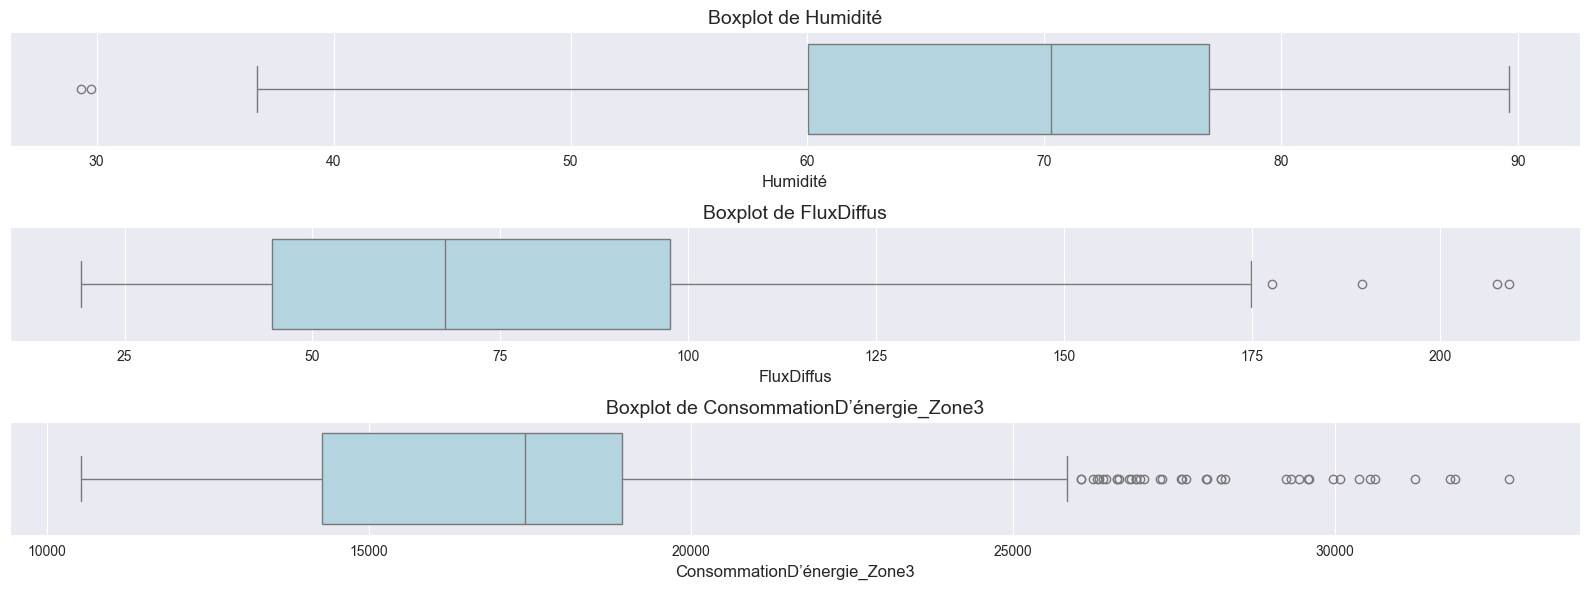

In [19]:
# Boxplots des variables qui contiennent des valeurs aberrantes

# Liste des colonnes avec des valeurs aberrantes
cols_with_outliers = ['Humidité', 'FluxDiffus', 'ConsommationD’énergie_Zone3']

plt.figure(figsize=(16, 6))

for i, col in enumerate(cols_with_outliers, 1):
    plt.subplot(len(cols_with_outliers), 1, i)
    sns.boxplot(x=daily_mean_data[col], color='lightblue')
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    
plt.tight_layout()
plt.show()

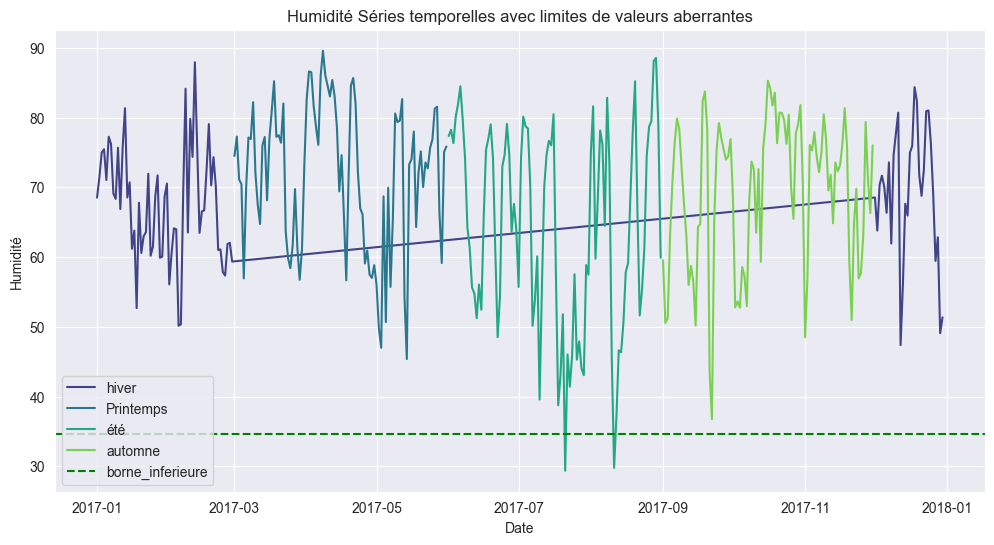

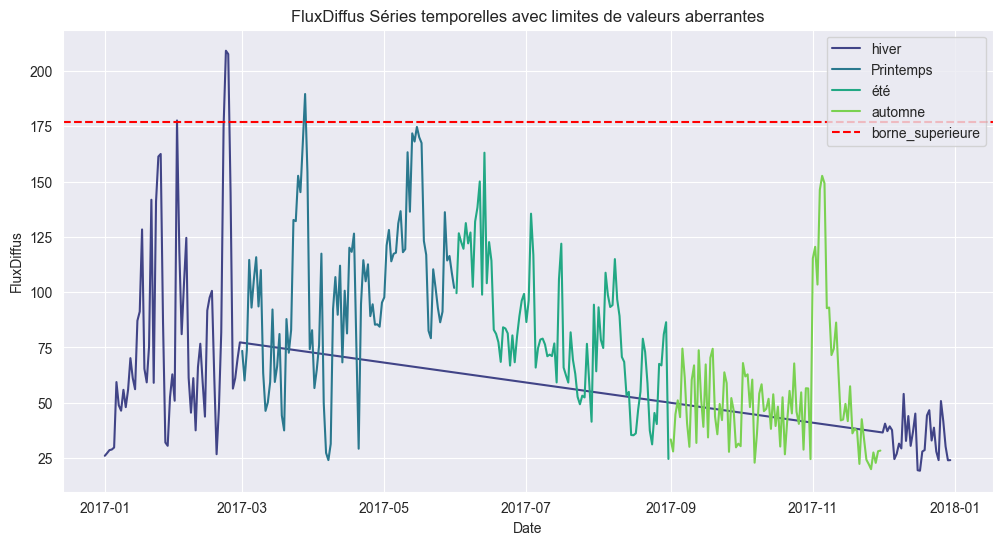

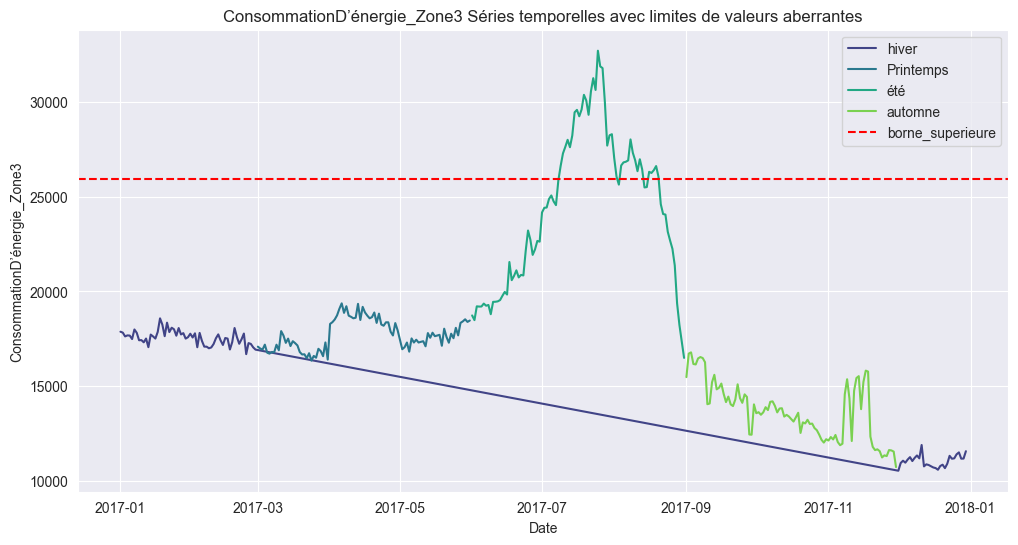

In [20]:
# Visualisation des séries temporelles des colonne qui ont des outliers avec indication des limites supérieure ou inférieure, colorées par saison

# Fonction pour déterminer la saison en fonction du mois de la date
# Saisons au Maroc : Printemps (mars, avril, mai), été (juin, juillet, août), automne (septembre, octobre, novembre), hiver (décembre, janvier, février)
def get_season(date):
    if date.month in [3, 4, 5]:
        return 'Printemps'
    elif date.month in [6, 7, 8]:
        return 'été'
    elif date.month in [9, 10, 11]:
        return 'automne'
    else:
        return 'hiver'

# Ajout d'une colonne "Saison"
daily_mean_data['Saison'] = [get_season(x) for x in daily_mean_data.index]


for col in cols_with_outliers:
    Q1 = daily_mean_data[col].quantile(0.25)
    Q3 = daily_mean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    borne_superieure = Q3 + 1.5 * IQR
    borne_inferieure = Q1 - 1.5 * IQR

    plt.figure(figsize=(12, 6))

    sns.lineplot(x=daily_mean_data.index, y=col, hue=daily_mean_data['Saison'], palette='viridis', data=daily_mean_data)
    # Ajouter une ligne horizontale pour indiquer la limite supérieure ou inférieure
    if col == 'Humidité':
        plt.axhline(borne_inferieure, color='g', linestyle='--', label='borne_inferieure')
    else: 
        plt.axhline(borne_superieure, color='r', linestyle='--', label='borne_superieure')

    plt.title(f'{col} Séries temporelles avec limites de valeurs aberrantes')
    plt.legend()
    plt.show()

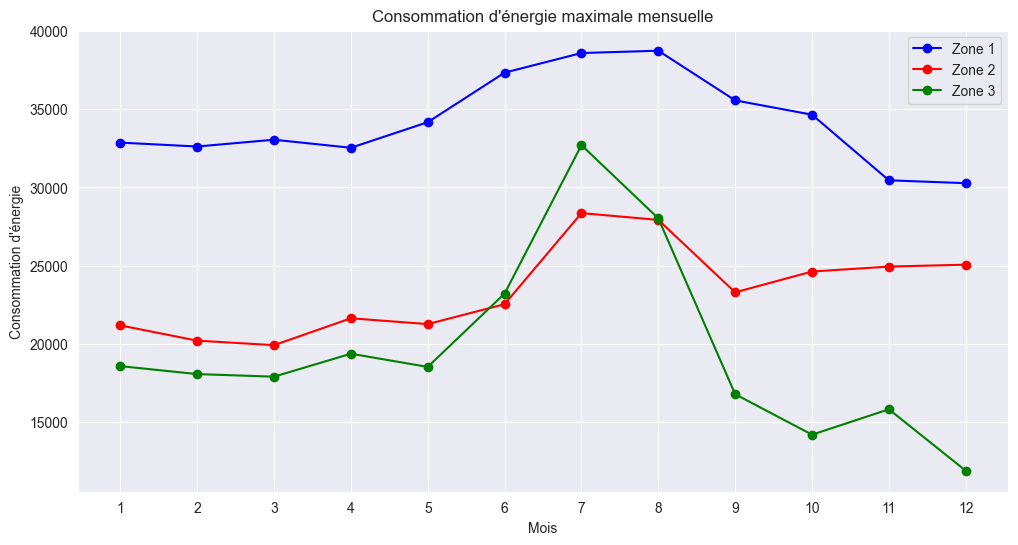

In [21]:
# Consommation d'énergie maximale mensuelle
daily_mean_data['Mois'] = daily_mean_data.index.month
monthly_max_zone1 = daily_mean_data.groupby('Mois')['ConsommationD’énergie_Zone1'].max().reset_index()
monthly_max_zone2 = daily_mean_data.groupby('Mois')['ConsommationD’énergie_Zone2'].max().reset_index()
monthly_max_zone3 = daily_mean_data.groupby('Mois')['ConsommationD’énergie_Zone3'].max().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_max_zone1['Mois'], monthly_max_zone1['ConsommationD’énergie_Zone1'], marker='o', linestyle='-', color='b', label='Zone 1')
plt.plot(monthly_max_zone2['Mois'], monthly_max_zone2['ConsommationD’énergie_Zone2'], marker='o', linestyle='-', color='r', label='Zone 2')
plt.plot(monthly_max_zone3['Mois'], monthly_max_zone3['ConsommationD’énergie_Zone3'], marker='o', linestyle='-', color='g', label='Zone 3')
plt.title('Consommation d\'énergie maximale mensuelle')
plt.xlabel('Mois')
plt.ylabel('Consommation d\'énergie')
plt.grid(True)
plt.xticks(range(1, 13))
plt.legend()
plt.show()

- ### Traitement des outliers

In [22]:
# Troncature des valeurs aberrantes basées sur l'IQR

# Créer une copie des données pour le nettoyage
data_cleaned = daily_mean_data.copy(deep=True)

# Colonnes à tronquer et bornes correspondantes
colonnes_à_tronquer = {
    'Humidité': 'lower',
    'FluxDiffus': 'upper',
    'ConsommationD’énergie_Zone3': 'upper'
}

def appliquer_troncature (df, col, borne):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR
    
    if borne == "upper":
        df[col] = df[col].clip(upper=borne_superieure)
    elif borne == "lower":
        df[col] = df[col].clip(lower=borne_inferieure)
    
    return df

# Appliquer la troncature sur les colonnes spécifiées
for col, borne in colonnes_à_tronquer.items():
    data_cleaned = appliquer_troncature(data_cleaned, col, borne)


# Vérification des valeurs aberrantes après troncature
valeurs_aberrantes_après_troncature = detecter_valeurs_aberrantes(data_cleaned[list(colonnes_à_tronquer.keys())])

In [23]:
# Sauvegarde des données nettoyées dans un fichier CSV
data_cleaned.to_csv('powerconsumption_cleaned.csv', index=True)

### **Synthèse de cette partie (traitement de données)** :

- **`Doublons`** : Les doublons ont été vérifiés et aucun n'a été trouvé dans les données.
  
- **`Valeurs manquantes`** : Nous avons vérifié les valeurs manquantes et aucune n'a été trouvée.

- **`Data Resampling`**: Les données ont été rééchantillonnées par jour, en prenant les moyennes quotidiennes pour les colonnes numériques et le mode pour la colonne 'Saison', ce dataframe rééchantillonné a été sauvegardé dans unn fichier CSV intitulé 'powerconsumption_resampled.csv'.
  
- **`Valeurs aberrantes`** : Les valeurs aberrantes ont été identifiées à l'aide de la méthode IQR, certaines ont été trouvées dans des colonnes telles que **Humidité**, **FluxDiffux** et **ConsommationD’énergie_Zone3**. De plus, nous avons ajouté une colonne **Saison** pour faciliter l'analyse.
  
- **`Traitement des valeurs aberrantes`** : Nous avons traité les valeurs aberrantes à l'aide de la méthode de troncature.
  
- **`Étape finale`** : Les données nettoyées ont été sauvegardées dans un nouveau fichier CSV intitulé 'powerconsumption_cleaned.csv'.

> **3 .**
> ## **Analyse descriptive**
> ****

In [24]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2017-01-01 to 2017-12-30
Freq: D
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Température                  364 non-null    float64
 1   Humidité                     364 non-null    float64
 2   VitesseDuVent                364 non-null    float64
 3   FluxDiffusGénéraux           364 non-null    float64
 4   FluxDiffus                   364 non-null    float64
 5   ConsommationD’énergie_Zone1  364 non-null    float64
 6   ConsommationD’énergie_Zone2  364 non-null    float64
 7   ConsommationD’énergie_Zone3  364 non-null    float64
 8   Saison                       364 non-null    object 
 9   Mois                         364 non-null    int32  
dtypes: float64(8), int32(1), object(1)
memory usage: 29.9+ KB


- ### Résumé statistique

In [25]:
data_cleaned.describe()

,Température,Humidité,VitesseDuVent,FluxDiffusGénéraux,FluxDiffus,ConsommationD’énergie_Zone1,ConsommationD’énergie_Zone2,ConsommationD’énergie_Zone3,Mois
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,18.810024,68.287496,1.959489,182.696614,74.819279,32344.970564,21042.509082,17581.427805,6.510989
std,5.201380,11.417772,2.203759,86.162320,38.049061,2669.367965,2708.561013,4348.487113,3.445345
min,8.627868,34.658090,0.064431,26.444944,19.250424,26771.518987,14779.098778,10530.612245,1.000000
25%,14.196771,60.025174,0.080561,113.057799,44.595582,30531.185497,19046.519309,14265.348116,4.000000
50%,19.085174,70.271111,0.236771,166.299003,67.660028,31920.994445,20807.354470,17421.566265,7.000000
75%,22.872292,76.936563,4.907153,264.700498,97.551215,34100.775705,23344.342106,18933.353535,9.250000
max,32.428958,89.585417,4.930493,335.065701,176.984666,38733.496116,28354.535865,25935.361665,12.000000


- ### La consommation d'énergie pour chaque zone

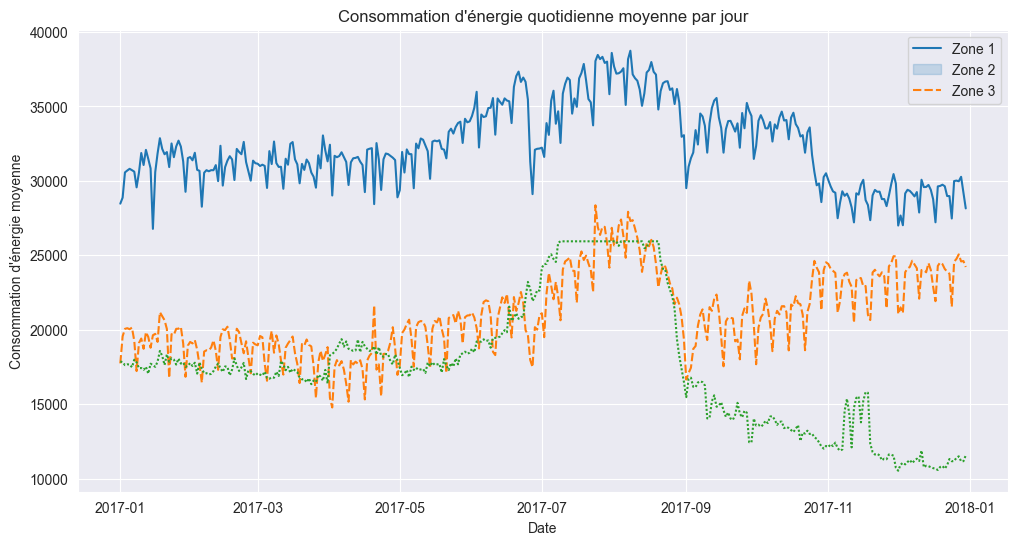

In [26]:
# Visualisation de la consommation d'énergie moyenne quotidienne pour chaque zone
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_cleaned[['ConsommationD’énergie_Zone1', 'ConsommationD’énergie_Zone2', 'ConsommationD’énergie_Zone3']])
plt.xlabel('Date')
plt.ylabel('Consommation d\'énergie moyenne')
plt.title('Consommation d\'énergie quotidienne moyenne par jour')
plt.legend(labels=['Zone 1', 'Zone 2', 'Zone 3'])
plt.show()

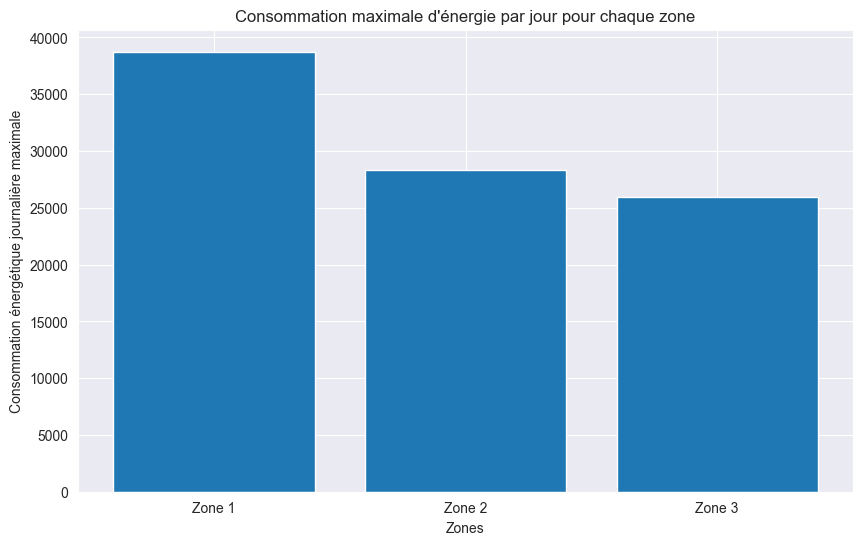

In [27]:
# Calculer la consommation maximale d'énergie par jour pour chaque zone
daily_max_Zone1 = data_cleaned['ConsommationD’énergie_Zone1'].max()
daily_max_Zone2 = data_cleaned['ConsommationD’énergie_Zone2'].max()
daily_max_Zone3 = data_cleaned['ConsommationD’énergie_Zone3'].max()

# créer le graphe
plt.figure(figsize=(10, 6))
plt.bar(['Zone 1', 'Zone 2', 'Zone 3'], [daily_max_Zone1, daily_max_Zone2, daily_max_Zone3])
plt.title('Consommation maximale d\'énergie par jour pour chaque zone')
plt.xlabel('Zones')
plt.ylabel('Consommation énergétique journalière maximale')
plt.grid(True)
plt.show()

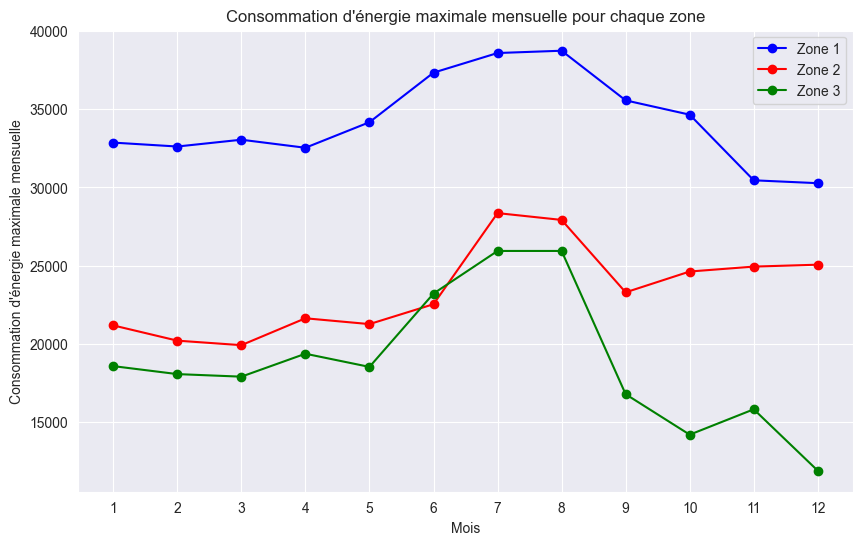

In [28]:
# Consommation d'énergie maximale mensuelle pour chaque zone
monthly_max_zone1 = data_cleaned.groupby('Mois')['ConsommationD’énergie_Zone1'].max().reset_index()
monthly_max_zone2 = data_cleaned.groupby('Mois')['ConsommationD’énergie_Zone2'].max().reset_index()
monthly_max_zone3 = data_cleaned.groupby('Mois')['ConsommationD’énergie_Zone3'].max().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_max_zone1['Mois'], monthly_max_zone1['ConsommationD’énergie_Zone1'], marker='o', linestyle='-', color='b', label='Zone 1')
plt.plot(monthly_max_zone2['Mois'], monthly_max_zone2['ConsommationD’énergie_Zone2'], marker='o', linestyle='-', color='r', label='Zone 2')
plt.plot(monthly_max_zone3['Mois'], monthly_max_zone3['ConsommationD’énergie_Zone3'], marker='o', linestyle='-', color='g', label='Zone 3')
plt.title('Consommation d\'énergie maximale mensuelle pour chaque zone')
plt.xlabel('Mois')
plt.ylabel('Consommation d\'énergie maximale mensuelle')
plt.grid(True)
plt.xticks(range(1, 13))
plt.legend()
plt.show()

### **Synthèse de cette partie (analyse descriptive)** :

- **`Descriptive Statistics`**: Les statistiques descriptives ont été calculées pour les données rééchantillonnées,

- **`Visualization`**: La consommation moyenne quotidienne d'énergie pour chaque zone a été visualisée et aussi la consommation maximale quotidienne et mensuelle.

> **4 .**
> ## **Analyse diagnostique**
> ****

- ### Corrélations entre la consommation d'énergie et les variables environnementales

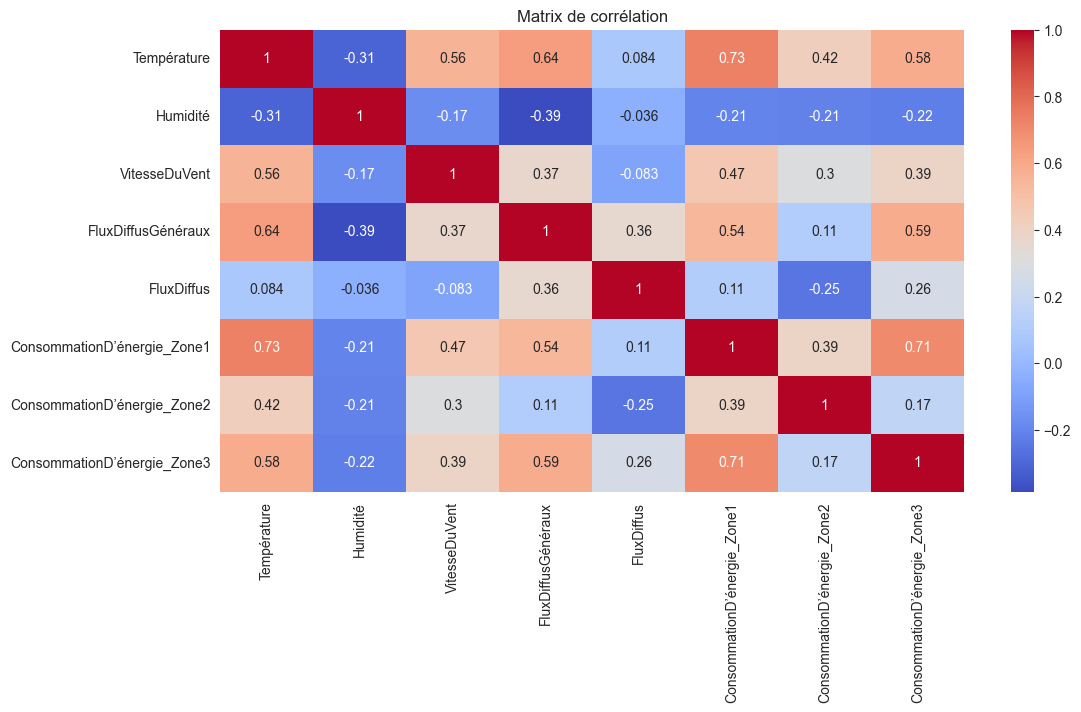

In [29]:
# calculer les corrélations
correlations = data_cleaned[['Température', 'Humidité', 'VitesseDuVent', 'FluxDiffusGénéraux', 'FluxDiffus', 'ConsommationD’énergie_Zone1', 'ConsommationD’énergie_Zone2', 'ConsommationD’énergie_Zone3']].corr()

# heatmap de corrélations
plt.figure(figsize=(12, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Matrix de corrélation')
plt.show()

- ### Visualisation de la relation entre la flux diffus généraux et la température

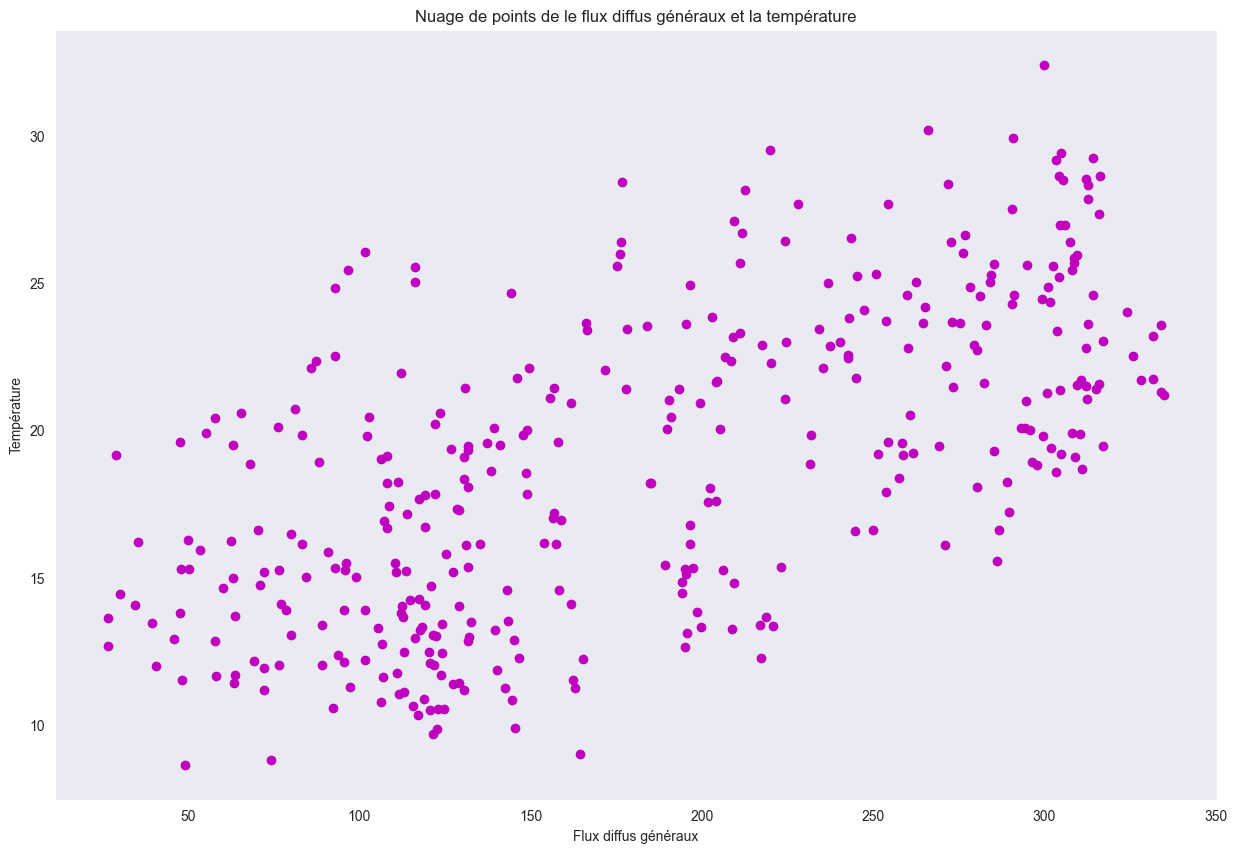

In [30]:
# Visualisation de la relation entre le flux diffus généraux et la température
plt.figure(figsize=(15, 10))
plt.scatter(data_cleaned["FluxDiffusGénéraux"], data_cleaned["Température"], color='m')
plt.xlabel('Flux diffus généraux')
plt.ylabel('Température')
plt.title('Nuage de points de le flux diffus généraux et la température')
plt.grid()
plt.show()

- ### Visualisation de la relation entre la température et la consommation d'énergie

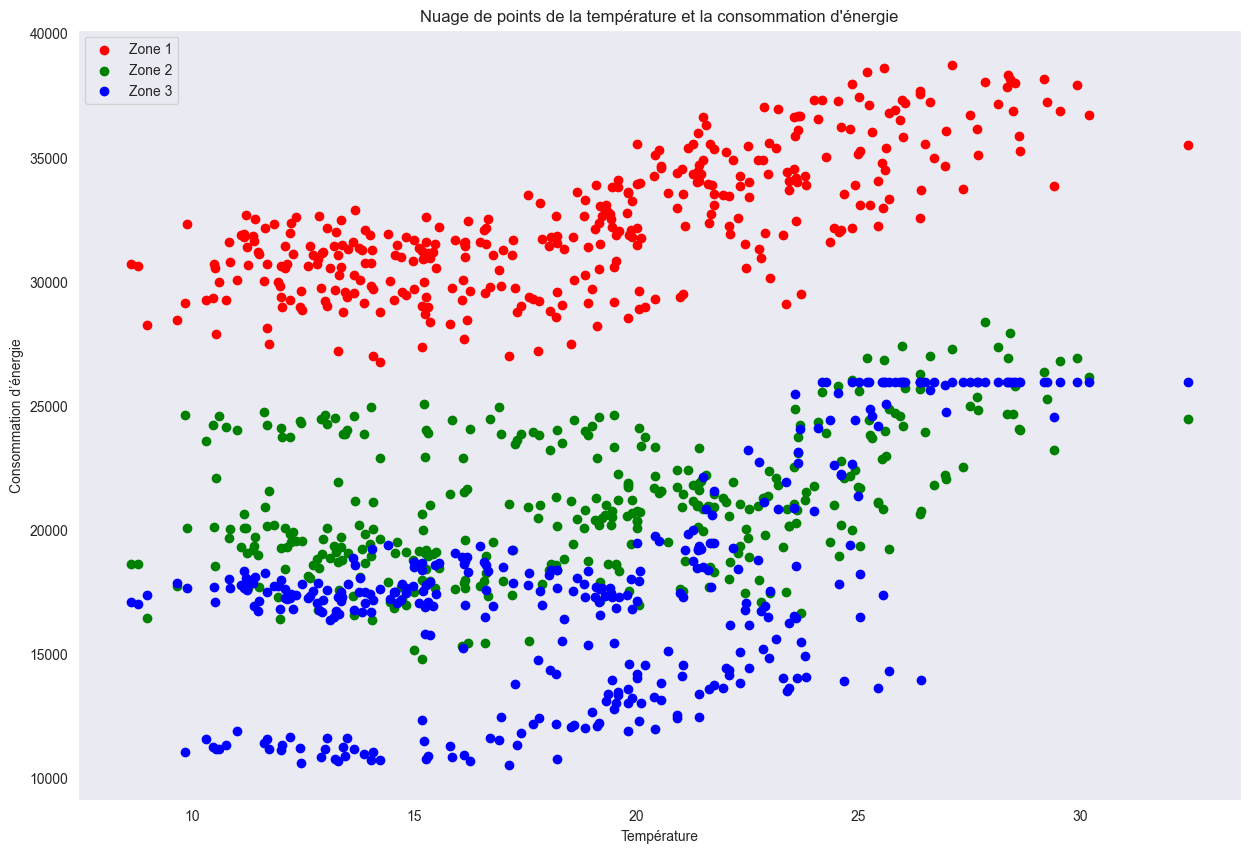

In [31]:
# Visualisation de la relation entre la température et la consommation d'énergie pour chaque zone
plt.figure(figsize=(15, 10))
plt.scatter(data_cleaned["Température"], data_cleaned["ConsommationD’énergie_Zone1"], color='r', label="Zone 1")
plt.scatter(data_cleaned["Température"], data_cleaned["ConsommationD’énergie_Zone2"], color='g', label="Zone 2")
plt.scatter(data_cleaned["Température"], data_cleaned["ConsommationD’énergie_Zone3"], color='b', label="Zone 3")
plt.xlabel('Température')
plt.ylabel('Consommation d’énergie')
plt.title('Nuage de points de la température et la consommation d\'énergie')
plt.legend(loc='upper left')
plt.grid()
plt.show()

- ### Test de normalité

In [32]:
from scipy.stats import shapiro

# Pour température, zone 1, zone 2 et zone 3
for col in ['Température', 'FluxDiffusGénéraux', 'ConsommationD’énergie_Zone1', 'ConsommationD’énergie_Zone2', 'ConsommationD’énergie_Zone3']:
    stat, p = shapiro(data_cleaned[[col]])
    print(f'Test de normalité pour {col} : p-value=%.3f' % (p))

Test de normalité pour Température : p-value=0.000
Test de normalité pour FluxDiffusGénéraux : p-value=0.000
Test de normalité pour ConsommationD’énergie_Zone1 : p-value=0.000
Test de normalité pour ConsommationD’énergie_Zone2 : p-value=0.000
Test de normalité pour ConsommationD’énergie_Zone3 : p-value=0.000


- ### Test de corrélation

In [33]:
from scipy.stats import pearsonr

corr, valeur_p = pearsonr(data_cleaned['FluxDiffusGénéraux'], data_cleaned['Température'])
print(f"Corrélation entre Température et FluxDiffusGénéraux : Corrélation de Pearson={corr:.3f}, valeur-p={valeur_p:.6f}")

Corrélation entre Température et FluxDiffusGénéraux : Corrélation de Pearson=0.638, valeur-p=0.000000


In [34]:
from scipy.stats import pearsonr

# Entre température et chaque zone
for zone in ['ConsommationD’énergie_Zone1', 'ConsommationD’énergie_Zone2', 'ConsommationD’énergie_Zone3']:
    corr, valeur_p = pearsonr(data_cleaned['Température'], data_cleaned[zone])
    print(f"Corrélation entre Température et {zone} : Corrélation de Pearson={corr:.3f}, valeur-p={valeur_p:.6f}")

Corrélation entre Température et ConsommationD’énergie_Zone1 : Corrélation de Pearson=0.735, valeur-p=0.000000
Corrélation entre Température et ConsommationD’énergie_Zone2 : Corrélation de Pearson=0.423, valeur-p=0.000000
Corrélation entre Température et ConsommationD’énergie_Zone3 : Corrélation de Pearson=0.585, valeur-p=0.000000


In [35]:
from scipy.stats import pearsonr

# Entre température et chaque zone
for zone in ['ConsommationD’énergie_Zone1', 'ConsommationD’énergie_Zone2', 'ConsommationD’énergie_Zone3']:
    corr, valeur_p = pearsonr(data_cleaned['FluxDiffusGénéraux'], data_cleaned[zone])
    print(f"Corrélation entre FluxDiffusGénéraux et {zone} : Corrélation de Pearson={corr:.3f}, valeur-p={valeur_p:.6f}")

Corrélation entre FluxDiffusGénéraux et ConsommationD’énergie_Zone1 : Corrélation de Pearson=0.545, valeur-p=0.000000
Corrélation entre FluxDiffusGénéraux et ConsommationD’énergie_Zone2 : Corrélation de Pearson=0.111, valeur-p=0.033812
Corrélation entre FluxDiffusGénéraux et ConsommationD’énergie_Zone3 : Corrélation de Pearson=0.585, valeur-p=0.000000


- ### **Boxplots des variables environnementales par saison avec médianes et moyennes**

C:\Users\user\AppData\Local\Temp\ipykernel_10128\3897289307.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medianes = data_cleaned.groupby('Saison')[cols_to_aggregate].median().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_10128\3897289307.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  moyennes = data_cleaned.groupby('Saison')[cols_to_aggregate].mean().reset_index()


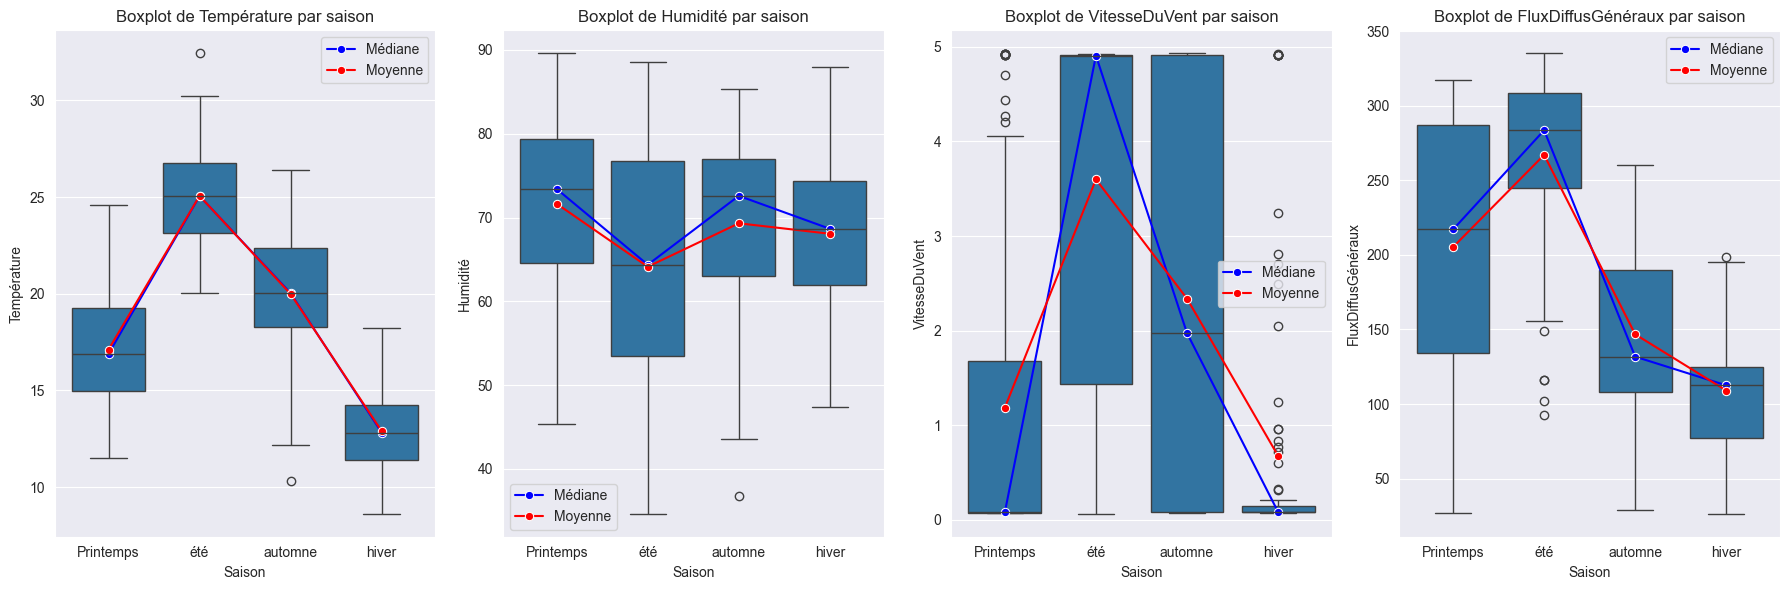

In [36]:
# Créer un type catégoriel ordonné pour la colonne "Saison"
ordre = ['Printemps', 'été', 'automne', 'hiver']
data_cleaned['Saison'] = pd.Categorical(data_cleaned['Saison'], categories=ordre, ordered=True)

# Calculer les médianes et les moyennes pour chaque variable et chaque saison
cols_to_aggregate = ['Température', 'Humidité', 'VitesseDuVent', 'FluxDiffusGénéraux']
medianes = data_cleaned.groupby('Saison')[cols_to_aggregate].median().reset_index()
moyennes = data_cleaned.groupby('Saison')[cols_to_aggregate].mean().reset_index()

medianes['Saison'] = pd.Categorical(medianes['Saison'], categories=ordre, ordered=True)
moyennes['Saison'] = pd.Categorical(moyennes['Saison'], categories=ordre, ordered=True)

plt.figure(figsize=(18, 6))
for i, col in enumerate(cols_to_aggregate, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x='Saison', y=col, data=data_cleaned)
    plt.title(f'Boxplot de {col} par saison')
    
    # Ajouter la ligne médiane et moyenne
    sns.lineplot(x = 'Saison', y = col, data = medianes.sort_values(by='Saison'), marker='o', color='blue', label = 'Médiane')
    sns.lineplot(x = 'Saison', y = col, data = moyennes.sort_values(by='Saison'), marker='o', color='red', label = 'Moyenne')

plt.tight_layout()
plt.legend()
plt.show()

- ### Visualisation de la consommation électrique maximale mensuelle avec les saisons

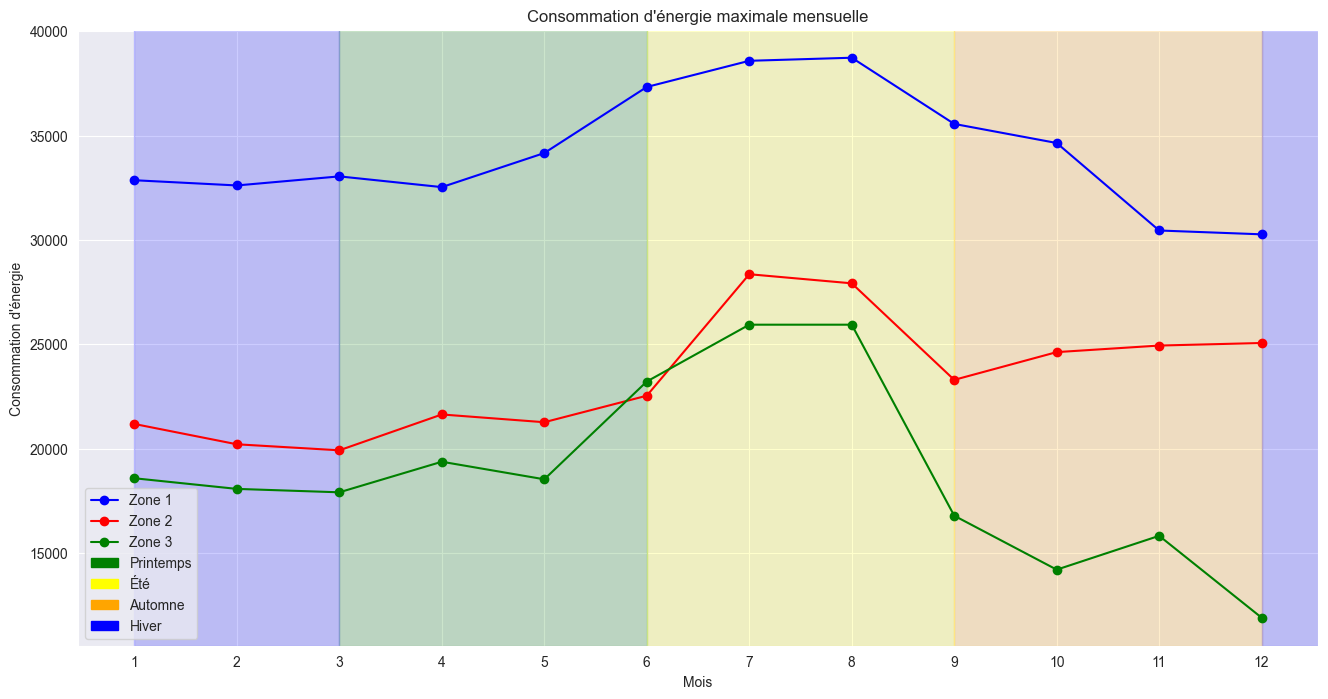

In [37]:
# Consommation d'énergie maximale mensuelle
monthly_max_zone1 = data_cleaned.groupby('Mois')['ConsommationD’énergie_Zone1'].max().reset_index()
monthly_max_zone2 = data_cleaned.groupby('Mois')['ConsommationD’énergie_Zone2'].max().reset_index()
monthly_max_zone3 = data_cleaned.groupby('Mois')['ConsommationD’énergie_Zone3'].max().reset_index()

# Visualiser de la consommation électrique maximale mensuelle
plt.figure(figsize=(16, 8))
line1, = plt.plot(monthly_max_zone1['Mois'], monthly_max_zone1['ConsommationD’énergie_Zone1'], marker='o', linestyle='-', color='b')
line2, = plt.plot(monthly_max_zone2['Mois'], monthly_max_zone2['ConsommationD’énergie_Zone2'], marker='o', linestyle='-', color='r')
line3, = plt.plot(monthly_max_zone3['Mois'], monthly_max_zone3['ConsommationD’énergie_Zone3'], marker='o', linestyle='-', color='g')

# Ajout des rectangles verticaux transparents pour chaque saison
printemps = mpatches.Patch(color='green', label='Printemps')
été = mpatches.Patch(color='yellow', label='Été')
automne = mpatches.Patch(color='orange', label='Automne')
hiver = mpatches.Patch(color='blue', label='Hiver')

plt.gca().add_patch(mpatches.Rectangle((3, plt.ylim()[0]), 3, plt.ylim()[1]-plt.ylim()[0], alpha=0.2, color='green'))
plt.gca().add_patch(mpatches.Rectangle((6, plt.ylim()[0]), 3, plt.ylim()[1]-plt.ylim()[0], alpha=0.2, color='yellow'))
plt.gca().add_patch(mpatches.Rectangle((9, plt.ylim()[0]), 3, plt.ylim()[1]-plt.ylim()[0], alpha=0.2, color='orange'))
plt.gca().add_patch(mpatches.Rectangle((12, plt.ylim()[0]), 1, plt.ylim()[1]-plt.ylim()[0], alpha=0.2, color='blue'))
plt.gca().add_patch(mpatches.Rectangle((1, plt.ylim()[0]), 2, plt.ylim()[1]-plt.ylim()[0], alpha=0.2, color='blue'))
plt.title('Consommation d\'énergie maximale mensuelle')
plt.xlabel('Mois')
plt.ylabel('Consommation d\'énergie')
plt.grid(True)
plt.xticks(range(1, 13))
handles=[line1, line2, line3, printemps, été, automne, hiver]
labels= ['Zone 1', 'Zone 2', 'Zone 3', 'Printemps', 'Été', 'Automne', 'Hiver']
plt.legend(handles, labels, loc="best")
plt.show()

- ### **Boxplots de la consommation d'énergie pour chaque zone par saison avec médianes et moyennes**

C:\Users\user\AppData\Local\Temp\ipykernel_10128\98396775.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medianes = data_cleaned.groupby('Saison')[cols_to_aggregate].median().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_10128\98396775.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  moyennes = data_cleaned.groupby('Saison')[cols_to_aggregate].mean().reset_index()


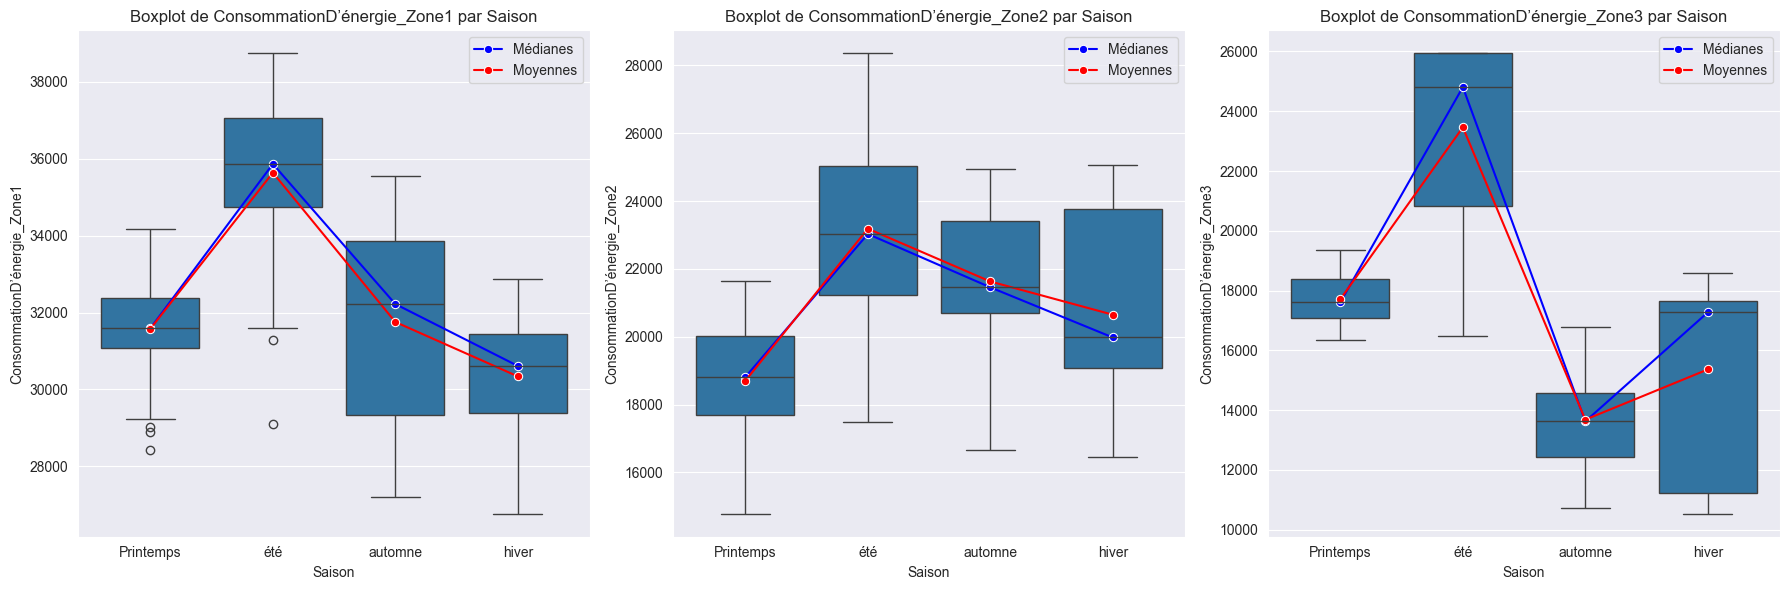

In [38]:
# Créer un type catégoriel ordonné pour la colonne "Saison"
ordre = ['Printemps', 'été', 'automne', 'hiver']
data_cleaned['Saison'] = pd.Categorical(data_cleaned['Saison'], categories=ordre, ordered=True)

# Calculer les médianes et les moyennes pour chaque zone et chaque saison
cols_to_aggregate = ['ConsommationD’énergie_Zone1', 'ConsommationD’énergie_Zone2', 'ConsommationD’énergie_Zone3']
medianes = data_cleaned.groupby('Saison')[cols_to_aggregate].median().reset_index()
moyennes = data_cleaned.groupby('Saison')[cols_to_aggregate].mean().reset_index()

medianes['Saison'] = pd.Categorical(medianes['Saison'], categories=ordre, ordered=True)
moyennes['Saison'] = pd.Categorical(moyennes['Saison'], categories=ordre, ordered=True)

plt.figure(figsize=(18, 6))
for i, col in enumerate(cols_to_aggregate, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Saison', y=col, data=data_cleaned)
    plt.title(f'Boxplot de {col} par Saison')
    
    # Ajouter la ligne médiane et moyenne
    sns.lineplot(x = 'Saison', y = col, data = medianes.sort_values(by='Saison'), marker='o', color='blue', label = 'Médianes')
    sns.lineplot(x = 'Saison', y = col, data = moyennes.sort_values(by='Saison'), marker='o', color='red', label = 'Moyennes')

plt.tight_layout()
plt.legend()
plt.show()

- ### **Visualisation de la corrélation entre la consommation d'énergie et d'autres variables pour chaque saison (pairplot)**

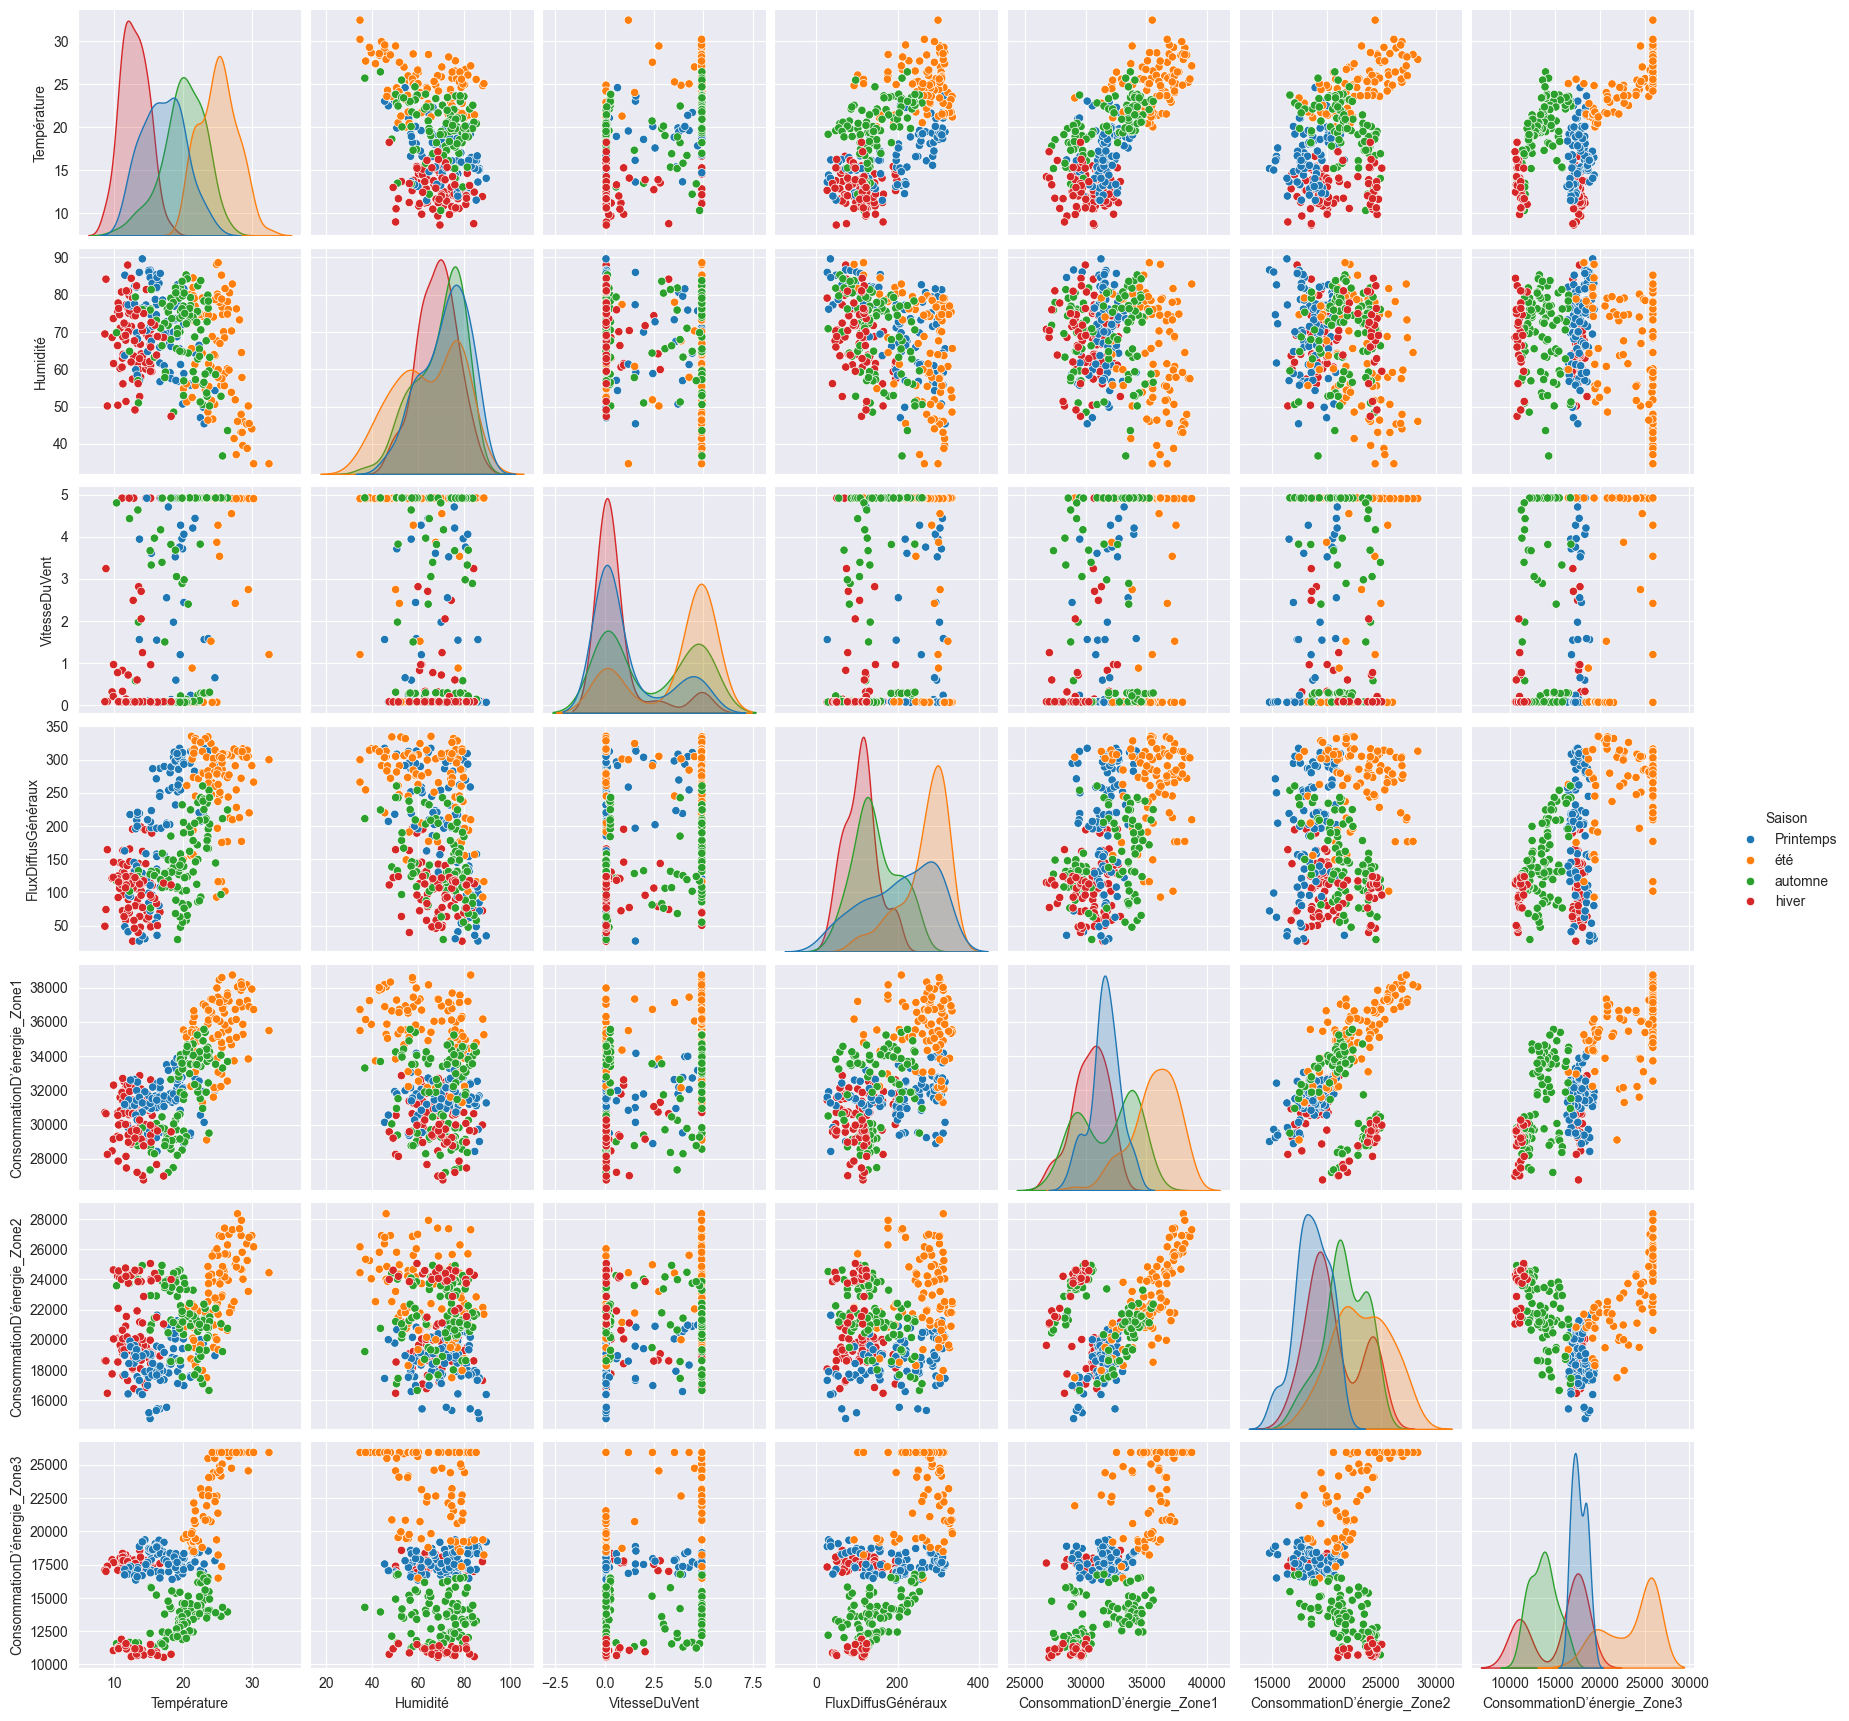

In [39]:
# Pairplot
sns.pairplot(data_cleaned[['Température', 'Humidité', 'VitesseDuVent', 'FluxDiffusGénéraux', 'ConsommationD’énergie_Zone1', 'ConsommationD’énergie_Zone2', 'ConsommationD’énergie_Zone3', 'Saison']], hue='Saison')
plt.show()

### **Synthèse de cette partie (analyse diagnostique) :**

**`Corrélation`** : Une corrélation positive modérée (0,6) existe entre la température et le flux diffus général. La température est également fortement corrélée à la consommation d'énergie de la zone 1, modérément avec la zone 2 et faiblement avec la zone 3. 
De plus, une corrélation modérée est observée entre le flux diffus général et les zones 1 et 3. 

Toutes ces corrélations sont statistiquement significatives, avec des p-values proches de zéro, suggérant que l'augmentation de la température ou le flux diffus général est associée à une hausse de la consommation d'énergie.

`Visualisation des boxplots par saison` : Les boxplots montrent qu'en été, la température et le flux diffus général atteignent leurs niveaux maximaux, tout comme la consommation d'énergie dans chaque zone.

`Variations saisonnières` : Les graphiques révèlent que la consommation d'énergie varie selon les saisons, avec un pic en été dans chaque zone, tandis qu'elle peut être plus faible en hiver pour certaines zones.

> **5 .**
> ## **Modélisation**
> ****

In [40]:
# importer les bibliothèques nécessaires
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [41]:
# faire une copie du dataframe précédemment nettoyé
d = data_cleaned.copy(deep=True)

d.head(2)

,Température,Humidité,VitesseDuVent,FluxDiffusGénéraux,FluxDiffus,ConsommationD’énergie_Zone1,ConsommationD’énergie_Zone2,ConsommationD’énergie_Zone3,Saison,Mois
Date,,,,,,,,,,
2017-01-01,9.675299,68.519306,0.315146,121.390771,25.993924,28465.232067,17737.791287,17868.795181,hiver,1
2017-01-02,12.476875,71.456319,0.076563,120.404486,27.227410,28869.493671,19557.725431,17820.763053,hiver,1


- ### Ajouter de nouvelles caractéristiques temporelles

In [42]:
# installer le paquet "holidays" s'il n'est pas déjà installé
!pip install holidays
import holidays

# convertir la variable catégorielle "Saison" en variables numériques
d = pd.get_dummies(d, columns=['Saison'])

# supprimer la colonne "Mois"
d.drop(['Mois'], axis=1, inplace=True)

# fonction permettant de créer de nouvelles caractéristiques
def create_features(df):
    df['Année'] = df.index.year
    df['Mois'] = df.index.month
    df['Jour'] = df.index.day
    df['Jour_De_La_Semaine'] = df.index.dayofweek
    df['isweekday'] = (df['Jour_De_La_Semaine'].apply(lambda x: 1 if x >= 5 else 0).astype(int))
    df['Trimestre'] = df.index.quarter
    df['Jour_De_L’Année'] = df.index.dayofyear
    df['Semaine_De_L’Année'] = df.index.isocalendar().week.astype(int)
    df['Jour_Ouvrable'] = df['Jour_De_La_Semaine'].isin([0, 1, 2, 3, 4]).astype(int)
    df['Jour_Férié'] = df.index.normalize().isin(holidays.country_holidays('MA', years=df.index.year.unique().tolist())).astype(int)

    return df

d = create_features(d)

# réinitialise l'index du dataframe
d.reset_index(drop=True, inplace=True)

In [43]:
d.head(5)

,Température,Humidité,VitesseDuVent,FluxDiffusGénéraux,FluxDiffus,ConsommationD’énergie_Zone1,ConsommationD’énergie_Zone2,ConsommationD’énergie_Zone3,Saison_Printemps,Saison_été,...,Année,Mois,Jour,Jour_De_La_Semaine,isweekday,Trimestre,Jour_De_L’Année,Semaine_De_L’Année,Jour_Ouvrable,Jour_Férié
0,9.675299,68.519306,0.315146,121.390771,25.993924,28465.232067,17737.791287,17868.795181,False,False,...,2017,1,1,6,1,1,1,52,0,1
1,12.476875,71.456319,0.076563,120.404486,27.227410,28869.493671,19557.725431,17820.763053,False,False,...,2017,1,2,0,0,1,2,1,1,0
2,12.100000,74.981667,0.076715,120.686014,28.574660,30562.447257,20057.269504,17620.803213,False,False,...,2017,1,3,1,0,1,3,1,1,0
3,10.509479,75.459792,0.082417,122.959319,28.827222,30689.831224,20102.077001,17673.694779,False,False,...,2017,1,4,2,0,1,4,1,1,0
4,10.866444,71.040486,0.083896,118.749861,29.741437,30802.911393,20033.941237,17664.176707,False,False,...,2017,1,5,3,0,1,5,1,1,0


In [44]:
d.dtypes

Température                    float64
Humidité                       float64
VitesseDuVent                  float64
FluxDiffusGénéraux             float64
FluxDiffus                     float64
ConsommationD’énergie_Zone1    float64
ConsommationD’énergie_Zone2    float64
ConsommationD’énergie_Zone3    float64
Saison_Printemps                  bool
Saison_été                        bool
Saison_automne                    bool
Saison_hiver                      bool
Année                            int32
Mois                             int32
Jour                             int32
Jour_De_La_Semaine               int32
isweekday                        int32
Trimestre                        int32
Jour_De_L’Année                  int32
Semaine_De_L’Année               int32
Jour_Ouvrable                    int32
Jour_Férié                       int32
dtype: object

- ### lag shift (décalage temporel)

In [45]:
# colonnes pour créer des caractéristiques de décalage
columns_to_lag = ['Température', 'Humidité', 'VitesseDuVent', 'FluxDiffusGénéraux', 'FluxDiffus', 
                  'ConsommationD’énergie_Zone1', 'ConsommationD’énergie_Zone2', 'ConsommationD’énergie_Zone3']

# valeurs de décalage (1, 2, 4, 7, 14, 30 jours)
lags = [1, 2, 4, 7, 14, 30]

df_lagged = d.copy()

for col in columns_to_lag:
    for lag in lags:
        df_lagged[f'{col}_lag{lag}'] = d[col].shift(lag)

# supprimer les lignes contenant des valeurs NaN en raison d'un décalage
df_lagged = df_lagged.dropna()

df_lagged.head()

,Température,Humidité,VitesseDuVent,FluxDiffusGénéraux,FluxDiffus,ConsommationD’énergie_Zone1,ConsommationD’énergie_Zone2,ConsommationD’énergie_Zone3,Saison_Printemps,Saison_été,...,ConsommationD’énergie_Zone2_lag4,ConsommationD’énergie_Zone2_lag7,ConsommationD’énergie_Zone2_lag14,ConsommationD’énergie_Zone2_lag30,ConsommationD’énergie_Zone3_lag1,ConsommationD’énergie_Zone3_lag2,ConsommationD’énergie_Zone3_lag4,ConsommationD’énergie_Zone3_lag7,ConsommationD’énergie_Zone3_lag14,ConsommationD’énergie_Zone3_lag30
30,15.267569,70.533819,4.916674,50.241694,50.894722,31593.966245,19179.103344,17762.008032,False,False,...,20191.691996,19651.671733,19180.547112,17737.791287,17577.991968,17504.698795,17724.016064,17995.220884,17854.979920,17868.795181
31,11.241597,56.077708,4.919806,163.062771,176.984666,31374.194915,19077.127659,17562.572864,False,False,...,19075.101317,20058.308004,21175.607903,19557.725431,17762.008032,17577.991968,17792.891566,17658.955823,18573.493976,17820.763053
32,11.112590,60.562986,4.916750,113.116167,118.672174,31880.932203,19304.229990,17783.236181,False,False,...,16838.221884,20066.464033,20905.952381,20057.269504,17562.572864,17762.008032,17504.698795,18061.204819,18239.919679,17620.803213
33,13.890069,64.120625,2.703979,78.499792,80.976604,30736.016949,18653.951368,17049.366834,False,False,...,18932.953394,20191.691996,20637.386018,20102.077001,17783.236181,17562.572864,17577.991968,17724.016064,17631.566265,17673.694779
34,11.276875,63.991389,0.083465,97.133181,103.870097,30666.610170,17635.663627,17805.587939,False,False,...,19179.103344,19075.101317,20048.860182,20033.941237,17049.366834,17783.236181,17762.008032,17792.891566,18346.104418,17664.176707


- ### Scaling (mise à l’échelle)

In [46]:
# colonnes à mettre à l'échelle
cols_to_scale = ['Température', 'Humidité', 'VitesseDuVent', 'FluxDiffusGénéraux', 'FluxDiffus', 
                 'ConsommationD’énergie_Zone1', 'ConsommationD’énergie_Zone2', 
                 'ConsommationD’énergie_Zone3'] + [f'{col}_lag{lag}' for col in columns_to_lag for lag in lags]

# MinMaxScaler
scaler = MinMaxScaler()
df_lagged[cols_to_scale] = scaler.fit_transform(df_lagged[cols_to_scale])

df_lagged.head(2)

,Température,Humidité,VitesseDuVent,FluxDiffusGénéraux,FluxDiffus,ConsommationD’énergie_Zone1,ConsommationD’énergie_Zone2,ConsommationD’énergie_Zone3,Saison_Printemps,Saison_été,...,ConsommationD’énergie_Zone2_lag4,ConsommationD’énergie_Zone2_lag7,ConsommationD’énergie_Zone2_lag14,ConsommationD’énergie_Zone2_lag30,ConsommationD’énergie_Zone3_lag1,ConsommationD’énergie_Zone3_lag2,ConsommationD’énergie_Zone3_lag4,ConsommationD’énergie_Zone3_lag7,ConsommationD’énergie_Zone3_lag14,ConsommationD’énergie_Zone3_lag30
30,0.278966,0.653149,0.997160,0.077107,0.200618,0.391738,0.324115,0.469426,False,False,...,0.398705,0.358926,0.324221,0.217945,0.457481,0.452723,0.466960,0.484565,0.475462,0.469754
31,0.109816,0.389963,0.997804,0.442672,1.000000,0.373015,0.316603,0.456480,False,False,...,0.316454,0.388880,0.471183,0.352005,0.469426,0.457481,0.471431,0.462737,0.522104,0.466597


- ### clustering (regroupement)

In [47]:
# définition du KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# ajustement du modèle sur des colonnes spécifiées
df_lagged['Cluster'] = kmeans.fit_predict(df_lagged[cols_to_scale])

df_lagged['Cluster'] = kmeans.labels_

df_lagged.head(2)

,Température,Humidité,VitesseDuVent,FluxDiffusGénéraux,FluxDiffus,ConsommationD’énergie_Zone1,ConsommationD’énergie_Zone2,ConsommationD’énergie_Zone3,Saison_Printemps,Saison_été,...,ConsommationD’énergie_Zone2_lag7,ConsommationD’énergie_Zone2_lag14,ConsommationD’énergie_Zone2_lag30,ConsommationD’énergie_Zone3_lag1,ConsommationD’énergie_Zone3_lag2,ConsommationD’énergie_Zone3_lag4,ConsommationD’énergie_Zone3_lag7,ConsommationD’énergie_Zone3_lag14,ConsommationD’énergie_Zone3_lag30,Cluster
30,0.278966,0.653149,0.997160,0.077107,0.200618,0.391738,0.324115,0.469426,False,False,...,0.358926,0.324221,0.217945,0.457481,0.452723,0.466960,0.484565,0.475462,0.469754,2
31,0.109816,0.389963,0.997804,0.442672,1.000000,0.373015,0.316603,0.456480,False,False,...,0.388880,0.471183,0.352005,0.469426,0.457481,0.471431,0.462737,0.522104,0.466597,2


- ### XGBoost model

In [48]:
# features
X = df_lagged.drop(['ConsommationD’énergie_Zone1', 'ConsommationD’énergie_Zone2', 'ConsommationD’énergie_Zone3'], axis=1)

# Variables cibles
y1 = df_lagged['ConsommationD’énergie_Zone1']
y2 = df_lagged['ConsommationD’énergie_Zone2']
y3 = df_lagged['ConsommationD’énergie_Zone3']

# diviser les données en deux ensembles, l'un pour l'entrainement, l'autre pour le test
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=0)
_, _, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=0)
_, _, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=0)

# créer et entrainer des modèles
model1 = xgb.XGBRegressor(random_state=0)
model2 = xgb.XGBRegressor(random_state=0)
model3 = xgb.XGBRegressor(random_state=0)

model1.fit(X_train, y1_train)
model2.fit(X_train, y2_train)
model3.fit(X_train, y3_train)

# faire des prédictions
y1_pred = model1.predict(X_test)
y2_pred = model2.predict(X_test)
y3_pred = model3.predict(X_test)

# évaluer les résultats
print("Zone 1 MSE:", np.mean((y1_pred - y1_test)**2))
print("Zone 1 MAE:", mean_absolute_error(y1_test, y1_pred))
print("Zone 1 R^2:", r2_score(y1_test, y1_pred))
print("______________________________________")

print("Zone 2 MSE:", np.mean((y2_pred - y2_test)**2))
print("Zone 2 MAE:", mean_absolute_error(y2_test, y2_pred))
print("Zone 2 R^2:", r2_score(y2_test, y2_pred))
print("______________________________________")

print("Zone 3 MSE:", np.mean((y3_pred - y3_test)**2))
print("Zone 3 MAE:", mean_absolute_error(y3_test, y3_pred))
print("Zone 3 R^2:", r2_score(y3_test, y3_pred))
print("______________________________________")

Zone 1 MSE: 0.007714253527098208
Zone 1 MAE: 0.06460362150002331
Zone 1 R^2: 0.8211990883747464
______________________________________
Zone 2 MSE: 0.004800048563000317
Zone 2 MAE: 0.051053945968942416
Zone 2 R^2: 0.8787987395565995
______________________________________
Zone 3 MSE: 0.0014034928447027655
Zone 3 MAE: 0.02151505022966065
Zone 3 R^2: 0.980235148664947
______________________________________


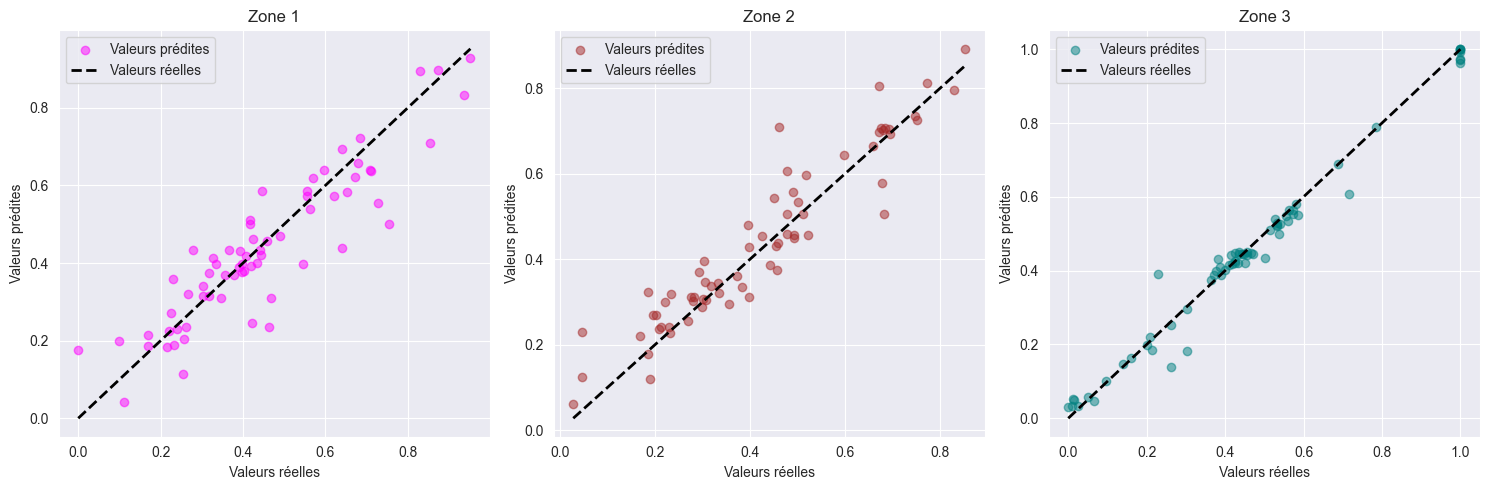

In [49]:
plt.figure(figsize=(15, 5))

# Zone 1
plt.subplot(1, 3, 1)
plt.scatter(y1_test, y1_pred, alpha=0.5, label='Valeurs prédites', color='magenta')
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=2, label='Valeurs réelles')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Zone 1")
plt.legend()

# Zone 2
plt.subplot(1, 3, 2)
plt.scatter(y2_test, y2_pred, alpha=0.5, label='Valeurs prédites', color='brown')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'k--', lw=2, label='Valeurs réelles')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Zone 2")
plt.legend()

# Zone 3
plt.subplot(1, 3, 3)
plt.scatter(y3_test, y3_pred, alpha=0.5, label='Valeurs prédites', color='teal')
plt.plot([y3_test.min(), y3_test.max()], [y3_test.min(), y3_test.max()], 'k--', lw=2, label='Valeurs réelles')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Zone 3")
plt.legend()

plt.tight_layout()
plt.show()

- ### Importance des caractéristiques (variables)

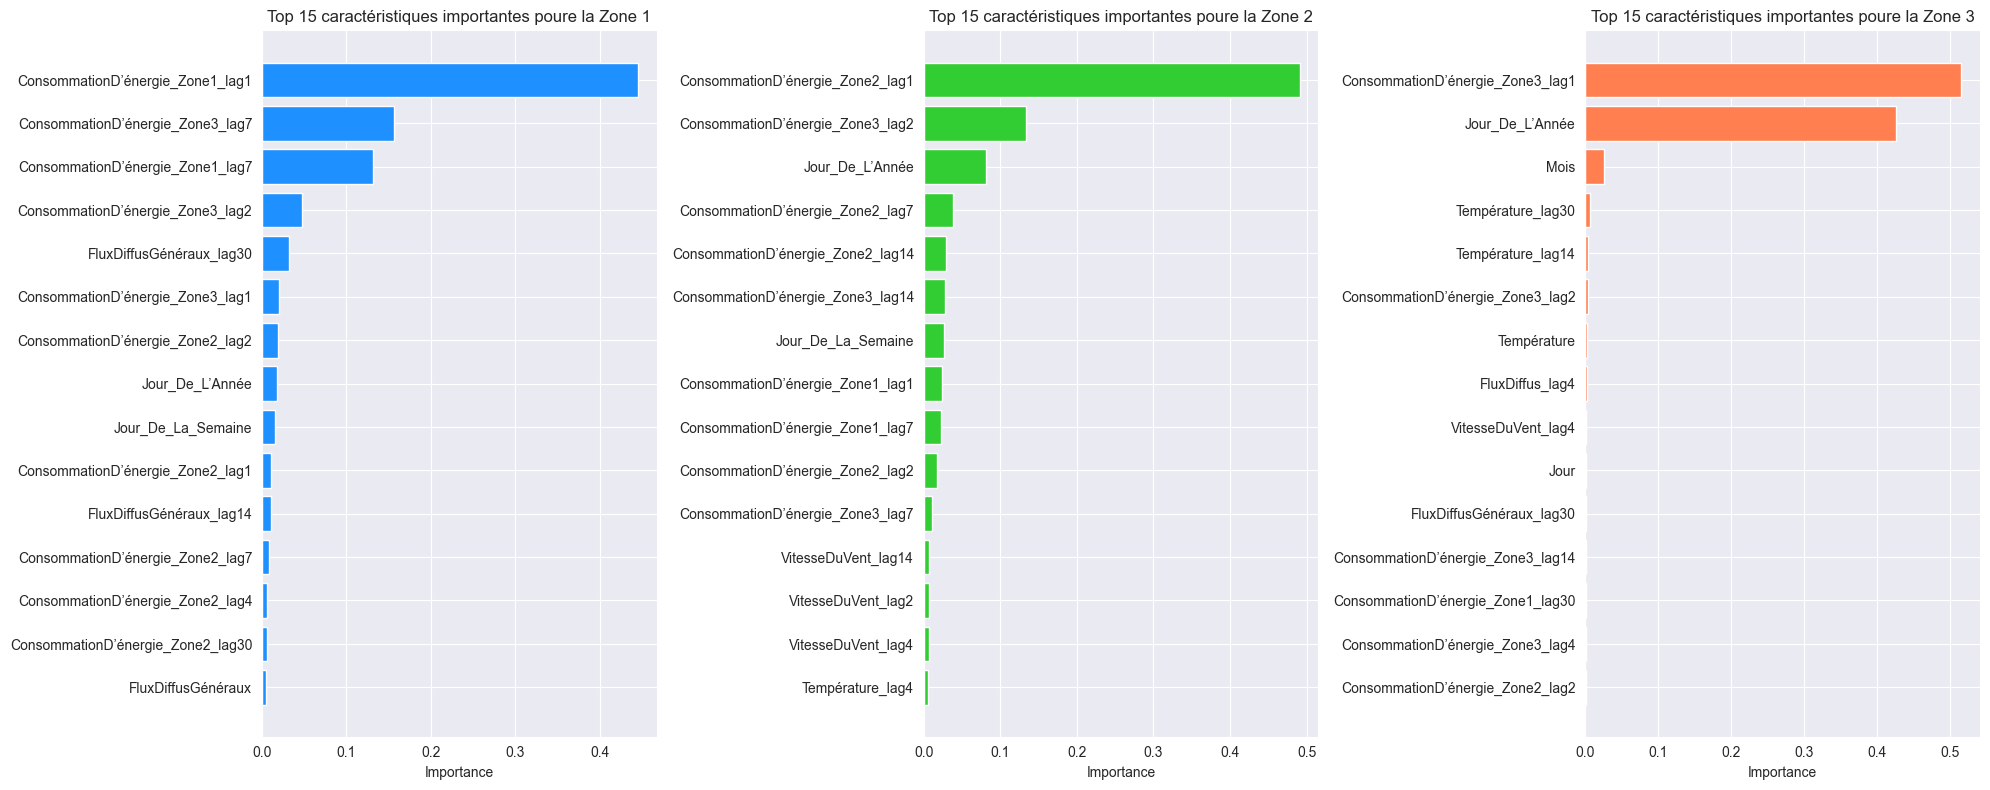

In [50]:
# features
X = df_lagged.drop(['ConsommationD’énergie_Zone1', 'ConsommationD’énergie_Zone2', 'ConsommationD’énergie_Zone3'], axis=1)

# Variables cibles
y1 = df_lagged['ConsommationD’énergie_Zone1']
y2 = df_lagged['ConsommationD’énergie_Zone2']
y3 = df_lagged['ConsommationD’énergie_Zone3']

# diviser les données en deux ensembles, l'un pour l'entrainement, l'autre pour le test
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=0)
_, _, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=0)
_, _, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=0)

# créer et entrainer des modèles
model1 = xgb.XGBRegressor(random_state=0)
model2 = xgb.XGBRegressor(random_state=0)
model3 = xgb.XGBRegressor(random_state=0)

model1.fit(X_train, y1_train)
model2.fit(X_train, y2_train)
model3.fit(X_train, y3_train)

# obtenir les valeurs d'importance des caractéristiques
importances1 = model1.feature_importances_
importances2 = model2.feature_importances_
importances3 = model3.feature_importances_

feature_names = X.columns

# créer un dataframe pour les importances des features (caractéristiques)
df_importances1 = pd.DataFrame({'Feature': feature_names, 'Importance': importances1}).sort_values(by='Importance', ascending=False).head(15)
df_importances2 = pd.DataFrame({'Feature': feature_names, 'Importance': importances2}).sort_values(by='Importance', ascending=False).head(15)
df_importances3 = pd.DataFrame({'Feature': feature_names, 'Importance': importances3}).sort_values(by='Importance', ascending=False).head(15)

# visualiser les importances des caractéristiques pour chaque zone
plt.figure(figsize=(20, 8))

# Zone 1
plt.subplot(1, 3, 1)
plt.barh(df_importances1['Feature'], df_importances1['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.title('Top 15 caractéristiques importantes poure la Zone 1')
plt.gca().invert_yaxis()

# Zone 2
plt.subplot(1, 3, 2)
plt.barh(df_importances2['Feature'], df_importances2['Importance'], color='limegreen')
plt.xlabel('Importance')
plt.title('Top 15 caractéristiques importantes poure la Zone 2')
plt.gca().invert_yaxis()

# Zone 3
plt.subplot(1, 3, 3)
plt.barh(df_importances3['Feature'], df_importances3['Importance'], color='coral')
plt.xlabel('Importance')
plt.title('Top 15 caractéristiques importantes poure la Zone 3')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()